In [9]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from tqdm import tqdm_notebook as tqdm
import tensorflow.keras as keras
import matplotlib
import torchvision

ModuleNotFoundError: No module named 'torchvision'

In [2]:
import sklearn.metrics as metrics

In [3]:
src_path = '/hddraid5/data/colin/cell_classification/data/PBC_dataset_normal_DIB'

In [4]:
cell_types = ['basophil', 'ig', 'lymphocyte', 'platelet', 'neutrophil', 'eosinophil', 'erythroblast', 'monocyte', 'garbage']

In [5]:
cell_paths = {}
for cell_type in cell_types:
    cell_paths[cell_type] = glob.glob(os.path.join(src_path, cell_type, '*.jpg'))

In [6]:
data_shape = (224, 224)

IndexError: list index out of range

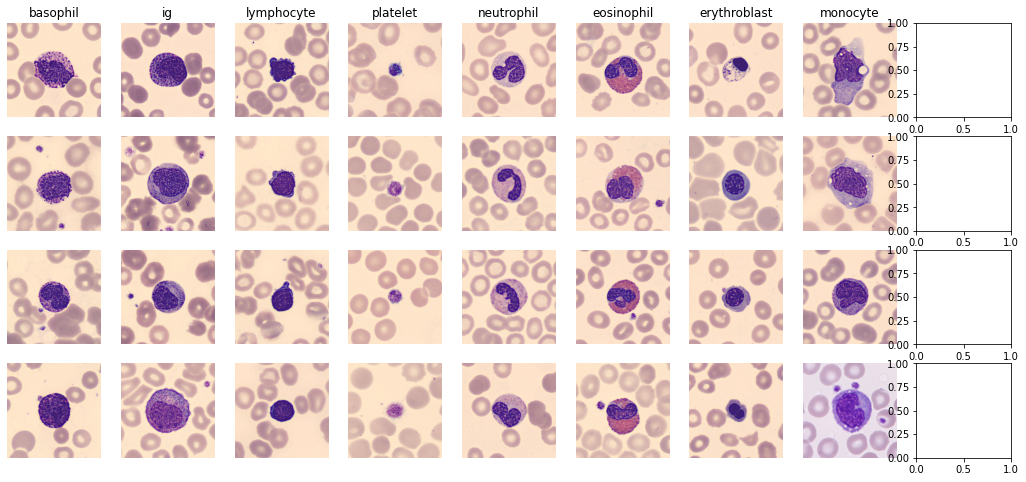

In [7]:
fig, axss = plt.subplots(nrows=4, ncols=9, figsize=(18,8))
for i, cell_type in enumerate(cell_types):
    for j in range(4):
        image = cv.cvtColor(cv.imread(cell_paths[cell_type][j]), cv.COLOR_BGR2RGB)
        axs = axss[j,i]
        axs.imshow(image)
        axs.axis('off')
    axss[0,i].set_title(cell_type)

In [8]:
# hacky load
cell_images = []
cell_labels = []
for cell_type in tqdm(cell_types):
    for cell_path in cell_paths[cell_type]:
        cell_labels.append(cell_type)
        image = cv.imread(cell_path)
        image = cv.resize(image, data_shape)
        cell_images.append(image)

/home/colin/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [9]:
label_indices = {
    label: index for index, label in enumerate(cell_types)
}

In [10]:
# lets generate our training data
x_data = np.array(cell_images) / 255
y_data = keras.utils.to_categorical(np.array([label_indices[cell_label] for cell_label in cell_labels]))

In [11]:
x_data = (x_data - np.mean(x_data.reshape(-1, 3), axis=0))/np.std(x_data.reshape(-1, 3), axis=0)

In [12]:
split = 0.8
seed = 0
indices = np.arange(0, len(y_data))
np.random.seed(seed)
np.random.shuffle(indices)
train_amount = int(len(indices)*split)
train_indices = indices[:train_amount]
val_indices = indices[train_amount:]

In [13]:
train_x = x_data[train_indices]
train_y = y_data[train_indices]
val_x = x_data[val_indices]
val_y = y_data[val_indices]

In [14]:
def get_model(input_shape=(224,224,3), model_name='mobilenet_v2'):
    if model_name == 'mobilenet_v2':
        base_model = keras.applications.mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    else:
        base_model = keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    inputs = keras.Input(shape=input_shape)
    base_model.trainable = False
    x = base_model(inputs, training=False) # IMPORTANT
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(256, activation='relu')(x) # just train this and following layer
    outputs = keras.layers.Dense(9, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

In [15]:
image_proc = keras.preprocessing.image.ImageDataGenerator(rotation_range=45, horizontal_flip=True, vertical_flip=True, shear_range=5, zca_whitening=True)

/home/colin/anaconda3/envs/covid/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [20]:
val_x[::100].shape

(35, 224, 224, 3)

In [16]:
val_x.dtype

dtype('float64')

In [ ]:
image_proc.fit(val_x[0:1], )

In [21]:
transformed = image_proc.flow(val_x)

In [23]:
for item in transformed:
    break

/home/colin/anaconda3/envs/covid/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/colin/anaconda3/envs/covid/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [24]:
item

array([[[[ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         ...,
         [ 0.9449973 ,  0.78672373,  0.7378789 ],
         [ 0.93214774,  0.75085866,  0.70668316],
         [ 0.9726657 ,  0.77105033,  0.7163256 ]],

        [[ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         ...,
         [ 0.95334774,  0.78672373,  0.73998094],
         [ 0.9237973 ,  0.7454663 ,  0.70037717],
         [ 0.98519135,  0.77824014,  0.7226316 ]],

        [[ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         [ 0.93855226,  0.74441797,  0.7238881 ],
         ...,
         [ 0.9616982 ,  0.78672373,  0.7420829 ],
         [ 0.9154469 ,  0.7400739 ,  0.6940712 ],
         [ 0.99771696,  0.78542995,  0.72893757]],

        ...,

        [[-0.38809133, -0.12285033, -0

In [34]:
model = get_model(model_name='dense')
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
callbacks = keras.callbacks.ModelCheckpoint('densenet_cellclass.hdf5')
model.fit(image_proc.flow(train_x, train_y, batch_size=16),
                    steps_per_epoch=len(train_x) / 16, epochs=20, validation_data=(val_x, val_y), shuffle=False, callbacks=[callbacks])

29089792/29084464 [==============================] - 3s 0us/step
  ...
    to  
  ['...']
Train for 942.5 steps, validate on 3770 samples
Epoch 1/20
943/942 [==============================] - 180s 191ms/step - loss: 0.6643 - accuracy: 0.7835 - val_loss: 0.5420 - val_accuracy: 0.8263
Epoch 2/20
943/942 [==============================] - 182s 193ms/step - loss: 0.3425 - accuracy: 0.8828 - val_loss: 0.3427 - val_accuracy: 0.8947
Epoch 3/20
943/942 [==============================] - 182s 193ms/step - loss: 0.3000 - accuracy: 0.8985 - val_loss: 0.2999 - val_accuracy: 0.9048
Epoch 4/20
943/942 [==============================] - 181s 192ms/step - loss: 0.2803 - accuracy: 0.9055 - val_loss: 0.3391 - val_accuracy: 0.8889
Epoch 5/20
943/942 [==============================] - 174s 185ms/step - loss: 0.2548 - accuracy: 0.9117 - val_loss: 0.2548 - val_accuracy: 0.9162
Epoch 6/20
943/942 [==============================] - 169s 179ms/step - loss: 0.2443 - accuracy: 0.9158 - val_loss: 0.2442 - val_acc

In [35]:
model.fit(image_proc.flow(train_x, train_y, batch_size=16),
                    steps_per_epoch=len(train_x) / 16, epochs=6, validation_data=(val_x, val_y), shuffle=False, callbacks=[callbacks])

  ...
    to  
  ['...']
Train for 942.5 steps, validate on 3770 samples
Epoch 1/6
943/942 [==============================] - 175s 186ms/step - loss: 0.1739 - accuracy: 0.9406 - val_loss: 0.2089 - val_accuracy: 0.9284
Epoch 2/6
943/942 [==============================] - 167s 178ms/step - loss: 0.1645 - accuracy: 0.9419 - val_loss: 0.2700 - val_accuracy: 0.9058
Epoch 3/6
943/942 [==============================] - 171s 181ms/step - loss: 0.1593 - accuracy: 0.9454 - val_loss: 0.2053 - val_accuracy: 0.9353
Epoch 4/6
943/942 [==============================] - 177s 188ms/step - loss: 0.1588 - accuracy: 0.9444 - val_loss: 0.2417 - val_accuracy: 0.9225
Epoch 5/6
943/942 [==============================] - 166s 176ms/step - loss: 0.1599 - accuracy: 0.9429 - val_loss: 0.2534 - val_accuracy: 0.9162
Epoch 6/6
943/942 [==============================] - 170s 180ms/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.2273 - val_accuracy: 0.9284


In [ ]:
# need to setup a confusion matrix to understand if the classification of the new class is OK/what it is most similar to

# we may need to add additional augmentation to take into account inter-system variarance which would prevent the classifier from being useful on other systems

In [36]:
saved_model = keras.models.load_model('densenet_cellclass.hdf5')

In [37]:
predicted = saved_model.predict(val_x)

In [42]:
pred_max = np.argmax(predicted, axis=-1)
act_max = np.argmax(val_y, axis=-1)

In [50]:
len(cell_types)

9

In [51]:
confusion = metrics.confusion_matrix(act_max, pred_max)

([<matplotlib.axis.YTick at 0x7fe9ec4c9a90>,
 [Text(0, 0, 'basophil'),
  Text(0, 0, 'ig'),
  Text(0, 0, 'lymphocyte'),
  Text(0, 0, 'platelet'),
  Text(0, 0, 'neutrophil'),
  Text(0, 0, 'eosinophil'),
  Text(0, 0, 'erythroblast'),
  Text(0, 0, 'monocyte'),
  Text(0, 0, 'garbage')])

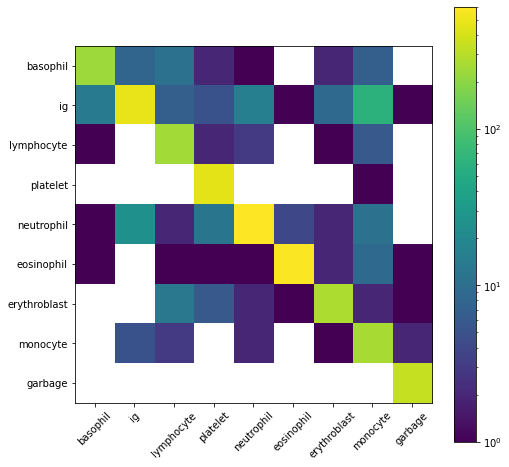

In [65]:
plt.figure(figsize=(8,8))
from matplotlib.colors import LogNorm
plt.imshow(confusion, norm=LogNorm())
plt.colorbar()
plt.xticks(np.arange(0, 9), cell_types, rotation=45)
plt.yticks(np.arange(0, 9), cell_types)

In [ ]:
plt.